# BigMart Sales


## 1). The Business Problem 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#### The Hypotheses
I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come-up with many more of these. Since we’re talking about stores and products, lets make different sets for each.

##### Store Level Hypotheses:

- City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
- Population Density: Stores located in densely populated areas should have higher sales because of more demand.
- Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
- Competitors: Stores having similar establishments nearby should have less sales because of more competition.
- Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
- Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
- Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
- Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

- Brand: Branded products should have higher sales because of higher trust in the customer.
- Packaging: Products with good packaging can attract customers and sell more.
- Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
- Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
- Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
- Advertising: Better advertising of products in the store will should higher sales in most cases.
- Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

## 2). Exploring The Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [2]:
fulldata = pd.read_csv('Train.csv')
full_test_df = pd.read_csv('Test.csv')

In [3]:
fulldata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
full_test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/0.-data-dictionary-1.png)
Image from <a href="https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/">Data Exploration</a>

In [5]:
# Check the features/ columns and rows in our dataset

fulldata.shape

(8523, 12)

In [6]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The train dataset contains 11 features variables and the target variable
7 of the variables are of object datatype
4 of the variables are of float datatype
1of the variable is of the int datatype

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [7]:
fulldata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. Item visiblity has a minimum value of 0
2. Item Outlet Sales seems to have an outlier, the maximumu value is quiet huge, the histogram will be right skewed because the median is smaller than the mean

In [8]:
fulldata_copy = fulldata.copy()

In [9]:
fulldata_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [10]:
missing_records = fulldata_copy.isna().sum()
missing_records

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Outlet_Size and Item_weight both have missing values

In [11]:
total_data_size = np.product(fulldata_copy.shape)
print(f'Percentage of missing value: {(missing_records.sum()/total_data_size) * 100:.2f}%')

Percentage of missing value: 3.79%


In [12]:
# Checking the unique values of Outlet size
fulldata_copy['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
fulldata_copy['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# Checking the unique values of Outlet size
fulldata_copy['Item_Weight'].unique()[:5]

array([ 9.3 ,  5.92, 17.5 , 19.2 ,  8.93])

Dataset seems to be in right datatype

In [15]:
for col in fulldata_copy.columns:
    if fulldata_copy[col].nunique() < 15:
        print(f'Unique values for {col}: {fulldata_copy[col].unique()}')
        print()

Unique values for Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values for Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values for Outlet_Establishment_Year: [1999 2009 1998 1987 1985 2002 2007 1997 2004]

Unique values for Outlet_Size: ['Medium' nan 'High' 'Small']

Unique values for Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Unique values for Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



1. Item fat content have some data inconsistency e.g. LF, low fat all means same thing
2. We have just about 10 outlets

In [16]:
def rename_fat_content(x):
    '''function that takes a string e.g LF/Regular
    return: it returns a string of either Low Fat or Regular
    '''
    if x in ['LF','low fat', 'Low Fat']:
        return 'Low Fat'
    elif x in ['reg', 'Regular']:
        return 'Regular'


cleaned_data = fulldata_copy.copy()
cleaned_data['Item_Fat_Content'] = cleaned_data['Item_Fat_Content'].apply(lambda x: rename_fat_content(x))

In [17]:
cleaned_data.to_csv('first_cleaned_data.csv')

### 3a).  Univariate Analysis

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

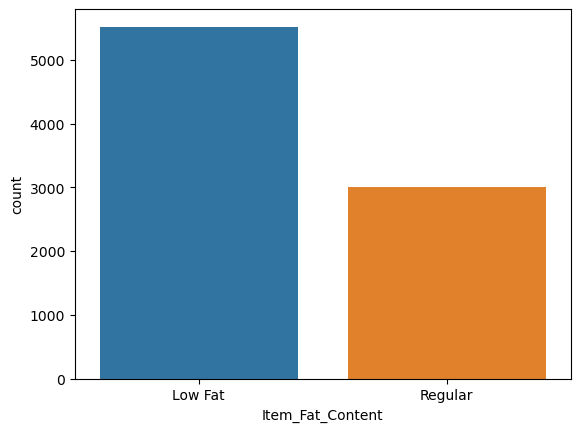

In [18]:
sns.countplot(x='Item_Fat_Content', data=cleaned_data)

Products with low fat have sales twice the Regular products sales

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

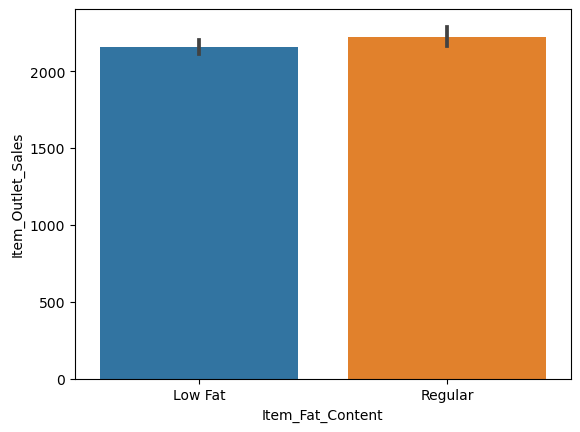

In [19]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=cleaned_data)

While Regular have a higher mean sales than Low Fat

<AxesSubplot: xlabel='count', ylabel='Item_Type'>

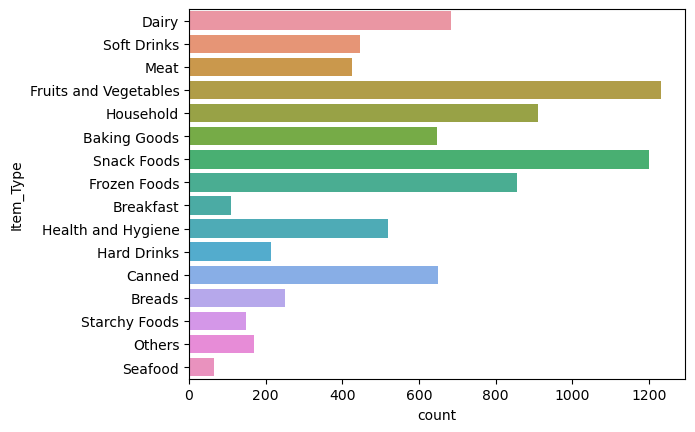

In [20]:
sns.countplot(y='Item_Type', data=cleaned_data, orient='v')

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

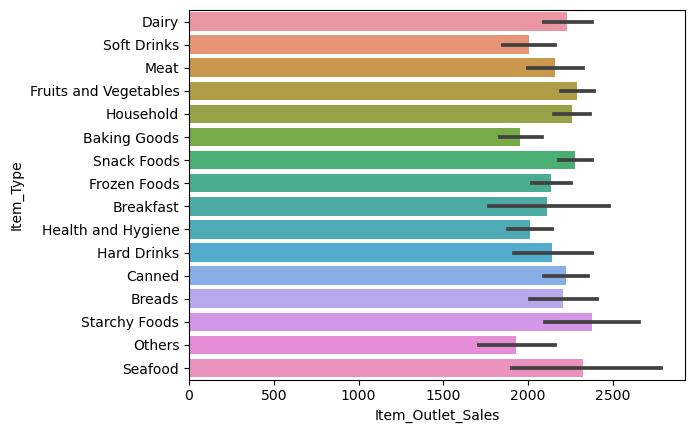

In [21]:
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=cleaned_data, orient='h')

Starchy Foods have the highest mean sales, while Other products have the least mean sales

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

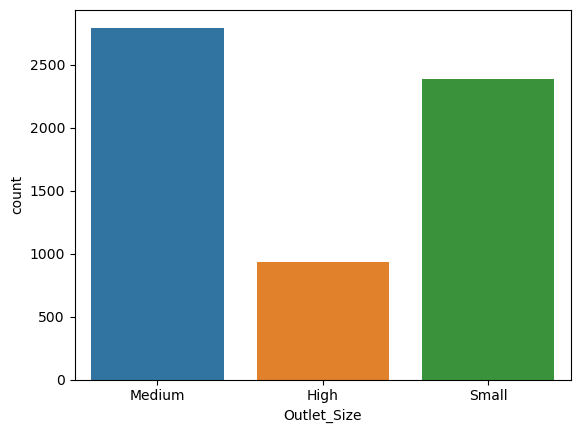

In [22]:
sns.countplot(x='Outlet_Size', data=cleaned_data)

<AxesSubplot: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

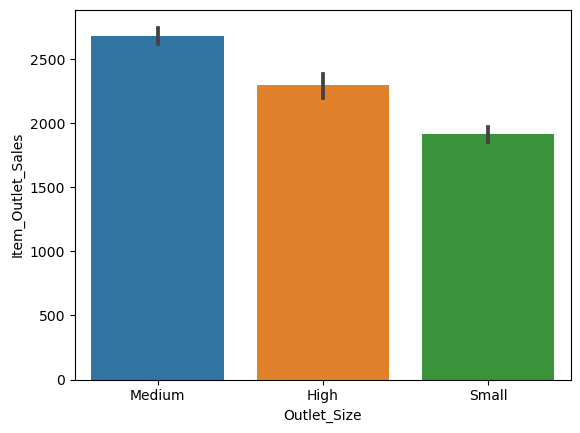

In [23]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=cleaned_data)

- Medium Outlets have the highest number of sales made, High  outlets have the least number of sales made
- High outlets have a higher mean sales than Small Outlets, eventhough small outlets has twice the number of sales made by high outlets.

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

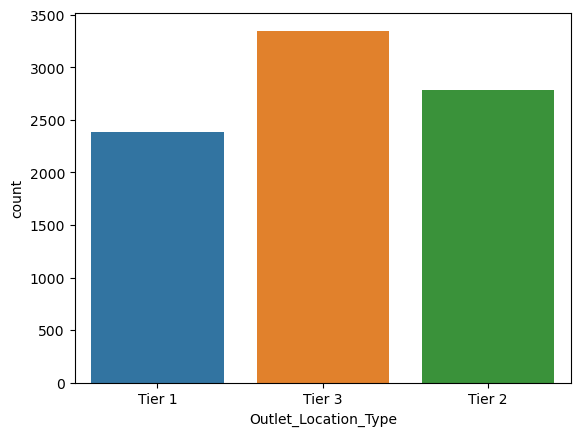

In [24]:
sns.countplot(x='Outlet_Location_Type', data=cleaned_data)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

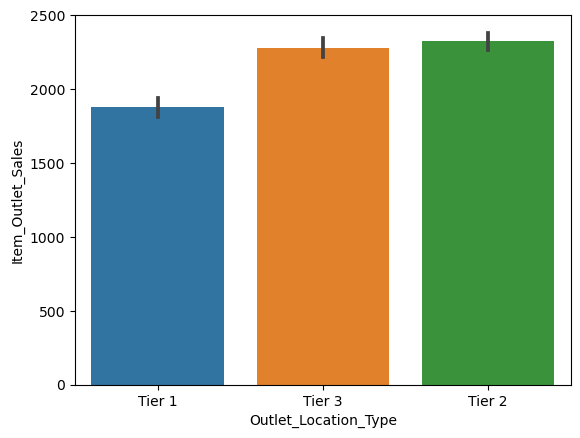

In [25]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',data=cleaned_data)

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

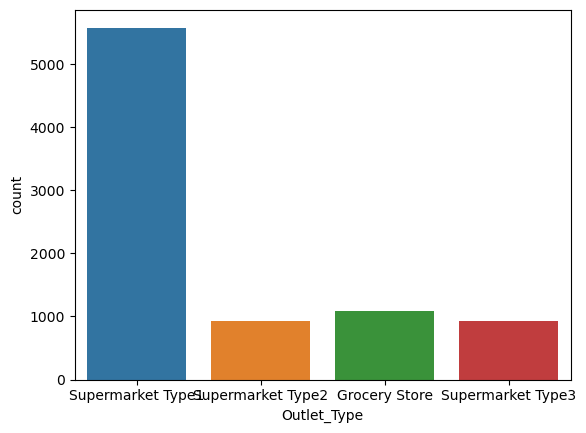

In [26]:
sns.countplot(x='Outlet_Type', data=cleaned_data)

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

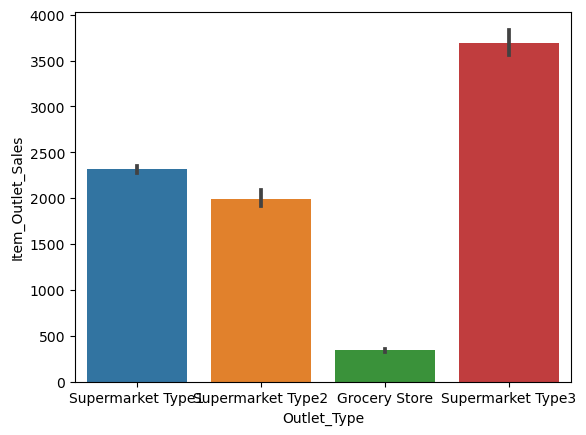

In [27]:
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales',data=cleaned_data)

- Type 3 Supermarket have higher mean sales than the rest.


<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

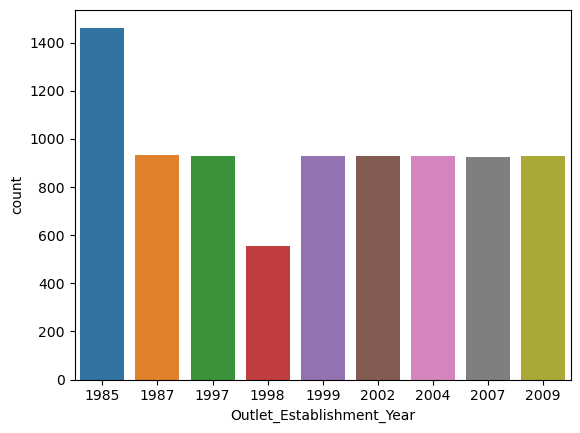

In [28]:
sns.countplot(x='Outlet_Establishment_Year', data=cleaned_data)

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

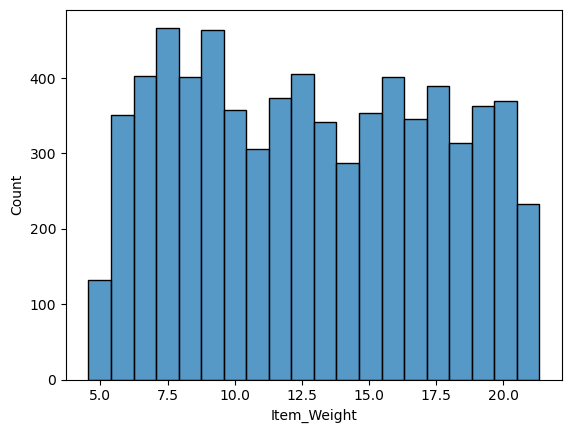

In [29]:
sns.histplot(x='Item_Weight', data=cleaned_data)

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

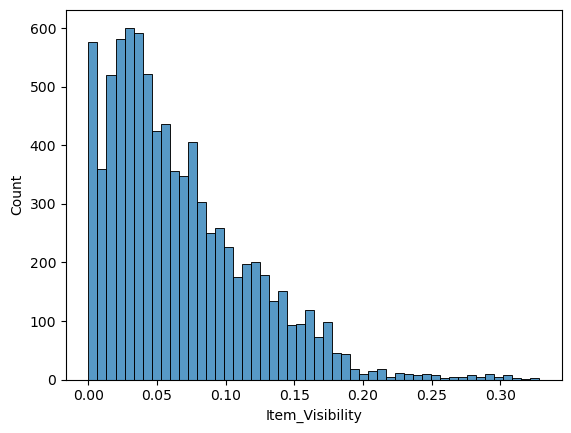

In [30]:
sns.histplot(x='Item_Visibility', data=cleaned_data)

1. Item visiblity is skewed to the right
2. Quiet a number of items have zero visibility meaning they don't cannot be found

But Items cannot have zero visibility and still be sold, so we would take the "zero" as a missing value and impute it with values.

In [31]:
cleaned_data[cleaned_data['Item_Visibility'] == 0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


Where Item visiblity is zero is at random, cutting across different products and categories

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

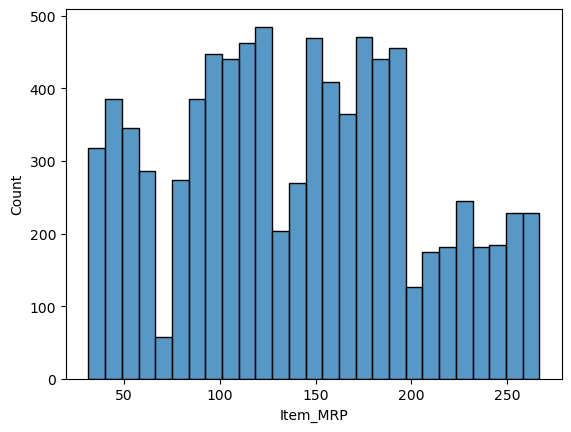

In [32]:
sns.histplot(x='Item_MRP', data=cleaned_data)

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

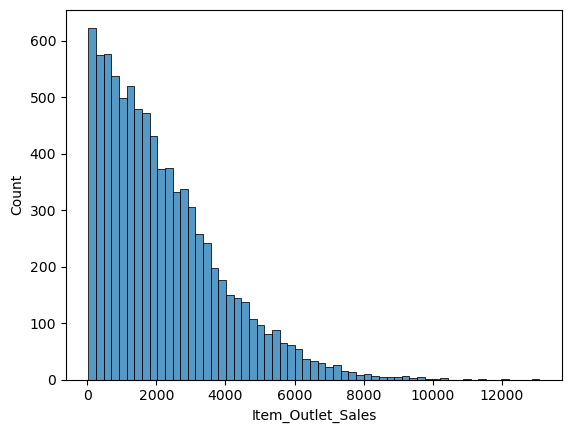

In [33]:
sns.histplot(x='Item_Outlet_Sales', data=cleaned_data)

## 3b). Bivariate Analysis

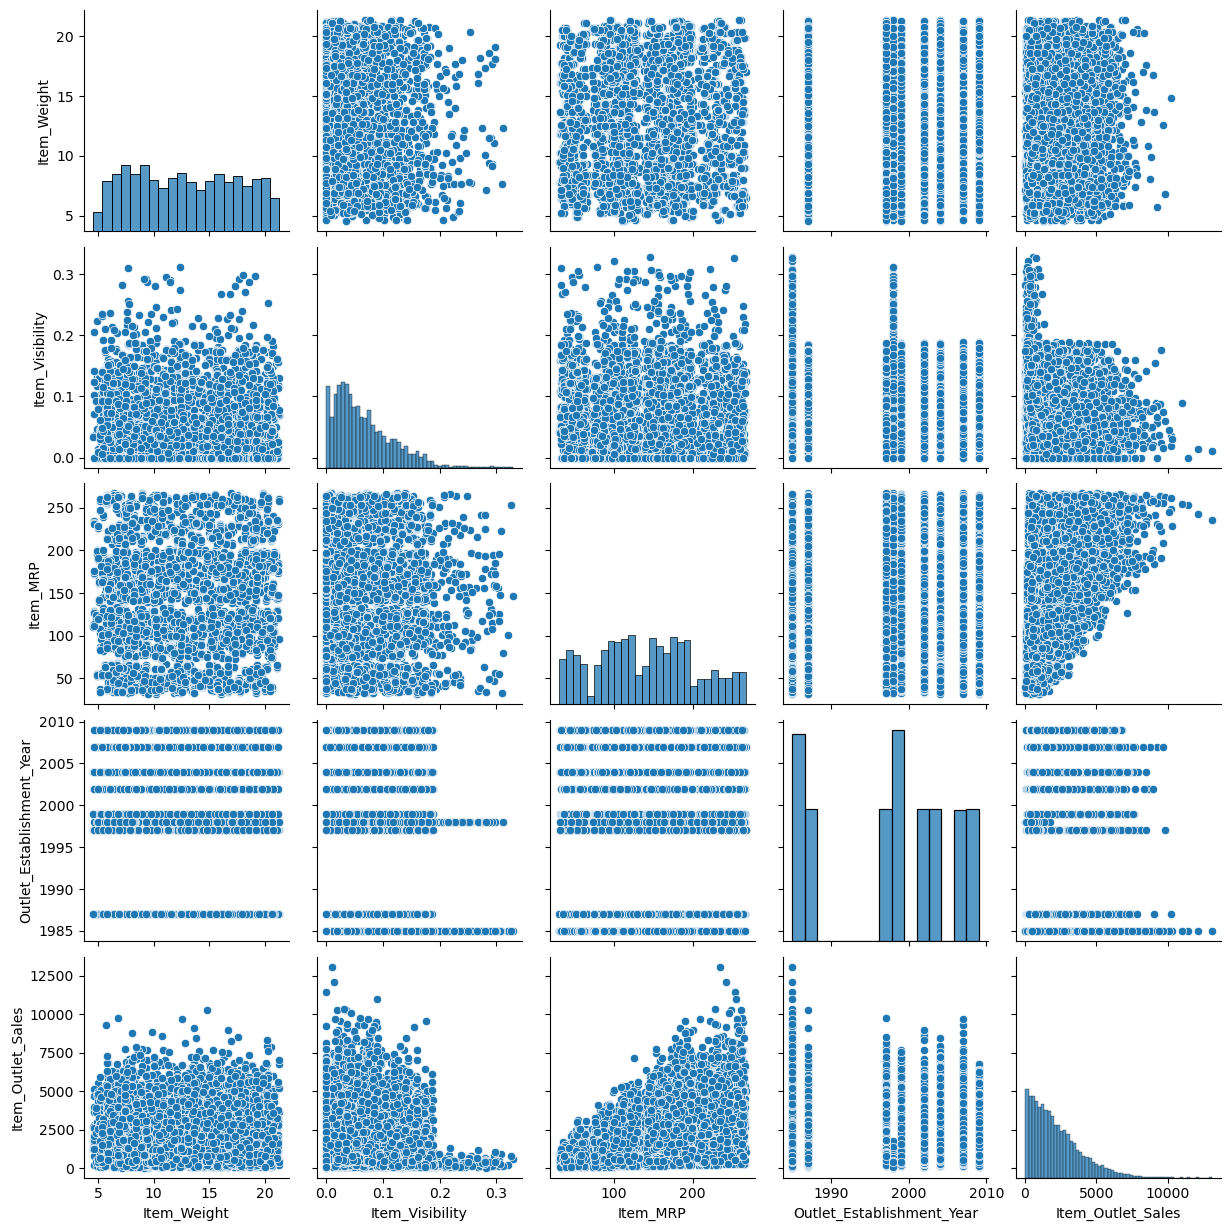

In [34]:
sns.pairplot(cleaned_data)

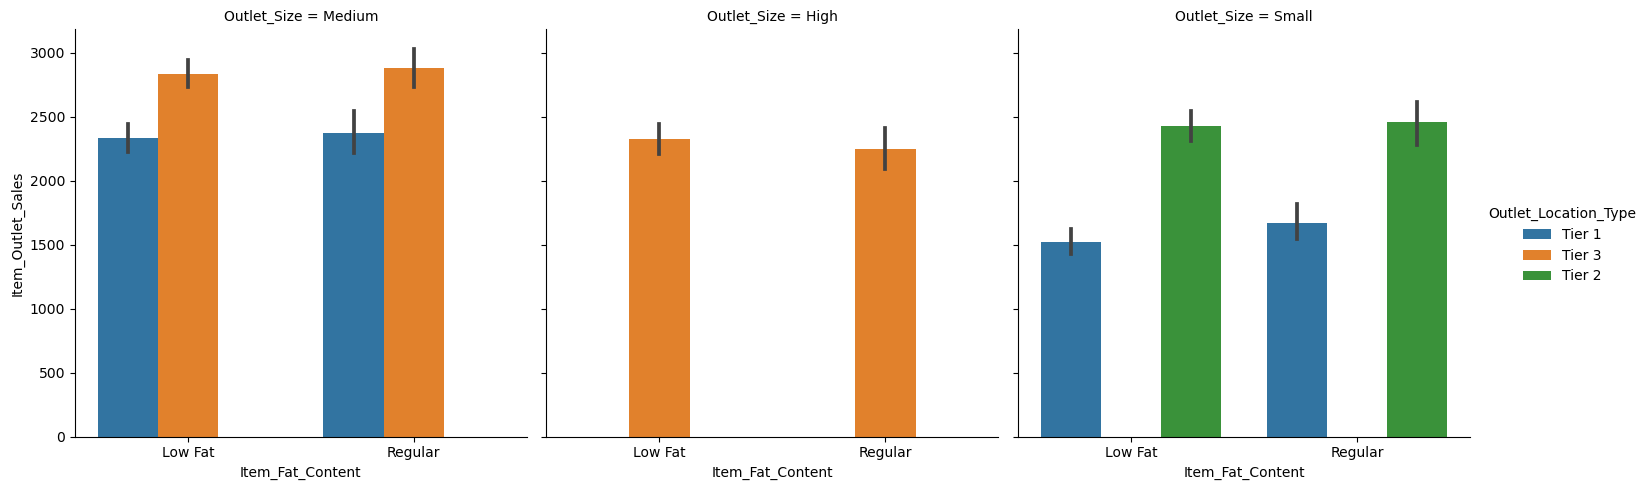

In [35]:
sns.catplot(data=cleaned_data, x='Item_Fat_Content',
            y='Item_Outlet_Sales',
            hue='Outlet_Location_Type',
            col='Outlet_Size',
            kind='bar'
           )

There is no difference between sales of Low fat and Regular for Medium, High and Small Outlet

In [36]:
categorical_groupby = cleaned_data.groupby(['Outlet_Type', ])['Item_Outlet_Sales']
categorical_groupby.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [37]:
categorical_groupby = cleaned_data.groupby(['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'])['Item_Outlet_Sales']
categorical_groupby.mean()

Item_Fat_Content  Outlet_Location_Type  Outlet_Size  Outlet_Type      
Low Fat           Tier 1                Medium       Supermarket Type1    2333.092785
                                        Small        Grocery Store         335.301498
                                                     Supermarket Type1    2211.052771
                  Tier 2                Small        Supermarket Type1    2428.540658
                  Tier 3                High         Supermarket Type1    2326.733685
                                        Medium       Supermarket Type2    2008.871133
                                                     Supermarket Type3    3643.946510
Regular           Tier 1                Medium       Supermarket Type1    2375.588354
                                        Small        Grocery Store         349.888875
                                                     Supermarket Type1    2398.149432
                  Tier 2                Small        Supermarket Type

While Grocery Store have the lowest mean sales for small outlet size in Tier 1 both in Low Fat and Regular products, Supermarket Type 3 have the highest mean sales.

In [38]:
categorical_groupby = cleaned_data.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales']
categorical_groupby.mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [39]:
categorical_groupby = cleaned_data.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales']
categorical_groupby.mean()

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             1764.509636
                       Regular             2147.340665
Breads                 Low Fat             2183.434031
                       Regular             2230.238058
Breakfast              Low Fat             2425.411966
                       Regular             1925.464652
Canned                 Low Fat             2208.714377
                       Regular             2243.441202
Dairy                  Low Fat             2145.174151
                       Regular             2370.875970
Frozen Foods           Low Fat             2117.535472
                       Regular             2149.861640
Fruits and Vegetables  Low Fat             2182.405740
                       Regular             2400.571761
Hard Drinks            Low Fat             2139.221622
Health and Hygiene     Low Fat             2010.000265
Household              Low Fat             2258.784300
Meat                   Lo

### 3c). Handling Missing Value 

In [40]:
outlet_size_missing_value = cleaned_data[cleaned_data['Outlet_Size'].isna()]
outlet_size_missing_value

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [41]:
outlet_size_missing_value['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [42]:
print(outlet_size_missing_value['Outlet_Establishment_Year'].unique())
print(outlet_size_missing_value['Outlet_Establishment_Year'].unique())
print(outlet_size_missing_value['Outlet_Size'].unique())
print(outlet_size_missing_value['Outlet_Location_Type'].unique())
print(outlet_size_missing_value['Outlet_Type'].unique())

[1998 2002 2007]
[1998 2002 2007]
[nan]
['Tier 3' 'Tier 2']
['Grocery Store' 'Supermarket Type1']


Discovered that missing value for Outlet size occurred in a particular outlets stores, in a paritcular year, for a particular Output location type and outlet type

In [43]:
def fill_missing_value(agg=pd.Series.mode, col='Outlet_Size'):
    return cleaned_data.groupby(['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type',])\
    [col].agg(agg)

In [44]:
fill_missing_value()

Outlet_Identifier  Outlet_Location_Type  Outlet_Type      
OUT010             Tier 3                Grocery Store            []
OUT013             Tier 3                Supermarket Type1      High
OUT017             Tier 2                Supermarket Type1        []
OUT018             Tier 3                Supermarket Type2    Medium
OUT019             Tier 1                Grocery Store         Small
OUT027             Tier 3                Supermarket Type3    Medium
OUT035             Tier 2                Supermarket Type1     Small
OUT045             Tier 2                Supermarket Type1        []
OUT046             Tier 1                Supermarket Type1     Small
OUT049             Tier 1                Supermarket Type1    Medium
Name: Outlet_Size, dtype: object

In [45]:
cleaned_data[~cleaned_data['Outlet_Size'].isna()].groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type  Item_Fat_Content
Tier 1                Low Fat              Small
                      Regular              Small
Tier 2                Low Fat              Small
                      Regular              Small
Tier 3                Low Fat             Medium
                      Regular             Medium
Name: Outlet_Size, dtype: object

In [46]:
outlet_size_missing_value = cleaned_data[cleaned_data['Item_Weight'].isna()]
outlet_size_missing_value

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [47]:
outlet_size_missing_value['Outlet_Identifier'].unique()

array(['OUT027', 'OUT019'], dtype=object)

In [48]:
print(outlet_size_missing_value['Outlet_Establishment_Year'].unique())
print(outlet_size_missing_value['Outlet_Size'].unique())
print(outlet_size_missing_value['Outlet_Location_Type'].unique())
print(outlet_size_missing_value['Outlet_Type'].unique())

[1985]
['Medium' 'Small']
['Tier 3' 'Tier 1']
['Supermarket Type3' 'Grocery Store']


Discovered that missing value for Item weight occurred in a particular outlets stores, in a paritcular year, for a particular Output location type and outlet type

In [49]:
fill_missing_value(pd.Series.mean, 'Item_Weight')

Outlet_Identifier  Outlet_Location_Type  Outlet_Type      
OUT010             Tier 3                Grocery Store        12.913153
OUT013             Tier 3                Supermarket Type1    13.006148
OUT017             Tier 2                Supermarket Type1    12.826668
OUT018             Tier 3                Supermarket Type2    12.873346
OUT019             Tier 1                Grocery Store              NaN
OUT027             Tier 3                Supermarket Type3          NaN
OUT035             Tier 2                Supermarket Type1    12.829349
OUT045             Tier 2                Supermarket Type1    12.649989
OUT046             Tier 1                Supermarket Type1    12.866801
OUT049             Tier 1                Supermarket Type1    12.917446
Name: Item_Weight, dtype: float64

In [50]:
cleaned_data[~cleaned_data['Item_Weight'].isna()].groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Weight'].agg(pd.Series.mean)

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    12.892124
Tier 2                Supermarket Type1    12.768628
Tier 3                Grocery Store        12.913153
                      Supermarket Type1    13.006148
                      Supermarket Type2    12.873346
Name: Item_Weight, dtype: float64

In [51]:
# cleaned_data['Outlet_Size'].fillna(lambda )

def handle_missing(row):
    if row.isna().any():
        if row['Outlet_Location_Type'] == 'Tier 2':
            return 'Small' # if the Outlet location type is Tier 2
        else:
            return 'Medium' # if the Outlet location type is Tier 3
    else:
        return row['Outlet_Size']

def handle_item_weight_missing(row):
    if row.isna().any():
        if row['Outlet_Location_Type'] == 'Tier 1':
            return 12.89 # if the Outlet location type is Tier 1
        else:
            return 12.91 # if the Outlet location type is Tier 3
    else:
        return row['Item_Weight']

In [52]:
dealing_with_missing_value = cleaned_data.copy()
dealing_with_missing_value['Outlet_Size'] = dealing_with_missing_value.apply(lambda x: handle_missing(x), axis=1)

In [53]:
dealing_with_missing_value['Item_Weight'] = dealing_with_missing_value.apply(lambda x: handle_item_weight_missing(x), axis=1)

In [54]:
dealing_with_missing_value.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [55]:
q3 = dealing_with_missing_value['Item_Visibility'].quantile(0.75)
q1 = dealing_with_missing_value['Item_Visibility'].quantile(0.25)

# Lower Bound: (Q1 - 1.5 * IQR)
# Upper Bound: (Q3 + 1.5 * IQR)
    
IQR = q3-q1
lower_bd = q1 - 1.5*IQR

print('InterquartileRange: ', IQR)
print('Lower Quartile: ', q1)
print('Lower bound: ', lower_bd)

InterquartileRange:  0.067595815
Lower Quartile:  0.0269894775
Lower bound:  -0.07440424500000001


In [56]:
item_visiblity_median = dealing_with_missing_value['Item_Visibility'].median()
item_visiblity_median

0.053930934

In [57]:
dealing_with_missing_value["Item_Visibility"] = dealing_with_missing_value['Item_Visibility'].apply(lambda x: item_visiblity_median if x==0 else x)
# dealing_with_missing_value['Item_Visibility'].apply(lambda x: x if x==0 else x)

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

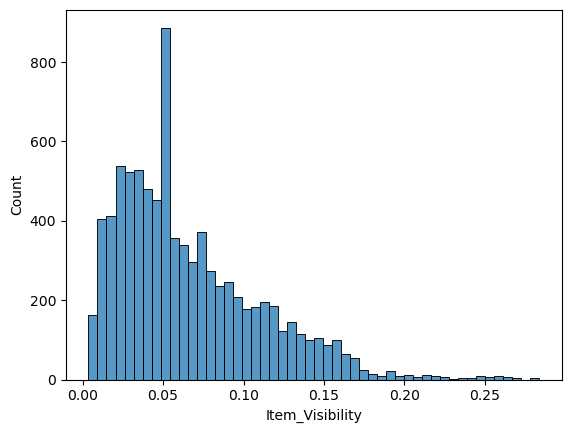

In [58]:
item_visibility = np.log1p(dealing_with_missing_value['Item_Visibility'])
sns.histplot(item_visibility)

In [59]:
print(f'Default Sales Value: {dealing_with_missing_value["Item_Outlet_Sales"][0]}')

print(f'Sales transformed to (Noramlized sales)logarithmic values: {np.log1p(dealing_with_missing_value["Item_Outlet_Sales"][0])}')

print(f'Log transformed back to Sales: {np.expm1(np.log1p(dealing_with_missing_value["Item_Outlet_Sales"][0]))}')

Default Sales Value: 3735.138
Sales transformed to (Noramlized sales)logarithmic values: 8.225807736568045
Log transformed back to Sales: 3735.138000000002


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

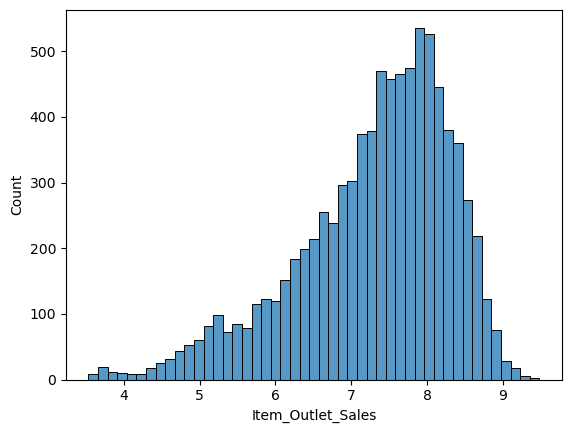

In [60]:
item_output_sales = np.log1p(dealing_with_missing_value['Item_Outlet_Sales'])
sns.histplot(item_output_sales)

In [61]:
dealing_with_missing_value['Item_Outlet_Sales'] = item_output_sales

## 4). Feature Engineering

In [62]:
dealing_with_missing_value.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


In [63]:
dealing_with_missing_value['Item_Type_Category'] = dealing_with_missing_value['Item_Identifier'].apply(lambda x: x[:2])

In [64]:
dealing_with_missing_value['Outlet_Age'] = 2013 - dealing_with_missing_value['Outlet_Establishment_Year']
# We used 2013 because it was stated that the data was collected in 2013

In [65]:
full_cleaned = dealing_with_missing_value.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [66]:
full_cleaned.to_csv('final_train_cleaned.csv')

## 5). PreProcessing Data

In [67]:
full_train = full_cleaned.drop(['Item_Outlet_Sales'], axis=1)
target = full_cleaned['Item_Outlet_Sales'].values

In [68]:
full_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Category,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,FD,14
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,FD,15
4,8.93,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,NC,26


In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [70]:
train_data, val_data, y_train, y_val = train_test_split(full_train, target, test_size=0.3, random_state=42)

In [71]:
cols = train_data.columns

In [72]:
labelencoder = LabelEncoder()

In [73]:
cat_col = ['Item_Type_Category', 'Item_Type']
# train_data[cat_col] = train_data[cat_col].apply(labelencoder.fit_transform)
# val_data[cat_col] = val_data[cat_col].apply(labelencoder.transform)

label_object = {}
categorical_columns = ['Item_Type_Category', 'Item_Type']
for col in categorical_columns:
    labelencoder = LabelEncoder()
#     labelencoder.fit(df[col])
    train_data[col] = labelencoder.fit_transform(train_data[col])
    label_object[col] = labelencoder

for col in categorical_columns:
    labelencoder =  label_object[col]
    val_data[col] = labelencoder.transform(val_data[col])


In [74]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Category,Outlet_Age
1921,7.72,Regular,0.147904,6,116.6466,Medium,Tier 3,Grocery Store,1,15
655,19.75,Low Fat,0.014301,9,103.0332,Small,Tier 1,Supermarket Type1,2,16
2229,12.91,Regular,0.054221,1,129.1310,Medium,Tier 3,Supermarket Type3,1,28
2537,19.35,Low Fat,0.118342,13,222.6088,Small,Tier 2,Supermarket Type1,1,11
3528,18.35,Regular,0.092150,5,184.8266,High,Tier 3,Supermarket Type1,1,26


In [75]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']),
    remainder='passthrough')

train_transformed = transformer.fit_transform(train_data)
train_transformed_df = pd.DataFrame(train_transformed, columns=transformer.get_feature_names_out())

val_transformed = transformer.transform(val_data)
val_transformed_df = pd.DataFrame(val_transformed, columns=transformer.get_feature_names_out())

In [76]:
train_transformed_df

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_Type,remainder__Item_MRP,remainder__Item_Type_Category,remainder__Outlet_Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.720,0.147904,6.0,116.6466,1.0,15.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.750,0.014301,9.0,103.0332,2.0,16.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.910,0.054221,1.0,129.1310,1.0,28.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19.350,0.118342,13.0,222.6088,1.0,11.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.350,0.092150,5.0,184.8266,1.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.395,0.286345,6.0,139.1838,1.0,15.0
5962,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.600,0.117575,5.0,75.6670,1.0,6.0
5963,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,17.600,0.018944,8.0,237.3590,2.0,11.0
5964,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20.350,0.054363,13.0,117.9466,1.0,6.0


In [77]:
transformer.get_feature_names_out()

array(['onehotencoder__Item_Fat_Content_Low Fat',
       'onehotencoder__Item_Fat_Content_Regular',
       'onehotencoder__Outlet_Size_High',
       'onehotencoder__Outlet_Size_Medium',
       'onehotencoder__Outlet_Size_Small',
       'onehotencoder__Outlet_Location_Type_Tier 1',
       'onehotencoder__Outlet_Location_Type_Tier 2',
       'onehotencoder__Outlet_Location_Type_Tier 3',
       'onehotencoder__Outlet_Type_Grocery Store',
       'onehotencoder__Outlet_Type_Supermarket Type1',
       'onehotencoder__Outlet_Type_Supermarket Type2',
       'onehotencoder__Outlet_Type_Supermarket Type3',
       'remainder__Item_Weight', 'remainder__Item_Visibility',
       'remainder__Item_Type', 'remainder__Item_MRP',
       'remainder__Item_Type_Category', 'remainder__Outlet_Age'],
      dtype=object)

In [78]:
train_transformed_df

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_Type,remainder__Item_MRP,remainder__Item_Type_Category,remainder__Outlet_Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.720,0.147904,6.0,116.6466,1.0,15.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.750,0.014301,9.0,103.0332,2.0,16.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.910,0.054221,1.0,129.1310,1.0,28.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19.350,0.118342,13.0,222.6088,1.0,11.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.350,0.092150,5.0,184.8266,1.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.395,0.286345,6.0,139.1838,1.0,15.0
5962,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.600,0.117575,5.0,75.6670,1.0,6.0
5963,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,17.600,0.018944,8.0,237.3590,2.0,11.0
5964,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20.350,0.054363,13.0,117.9466,1.0,6.0


In [79]:
y_train

array([4.77783359, 7.11590571, 8.50402244, ..., 8.72361109, 7.40904704,
       6.87358817])

In [80]:
train_transformed_df.dtypes

onehotencoder__Item_Fat_Content_Low Fat         float64
onehotencoder__Item_Fat_Content_Regular         float64
onehotencoder__Outlet_Size_High                 float64
onehotencoder__Outlet_Size_Medium               float64
onehotencoder__Outlet_Size_Small                float64
onehotencoder__Outlet_Location_Type_Tier 1      float64
onehotencoder__Outlet_Location_Type_Tier 2      float64
onehotencoder__Outlet_Location_Type_Tier 3      float64
onehotencoder__Outlet_Type_Grocery Store        float64
onehotencoder__Outlet_Type_Supermarket Type1    float64
onehotencoder__Outlet_Type_Supermarket Type2    float64
onehotencoder__Outlet_Type_Supermarket Type3    float64
remainder__Item_Weight                          float64
remainder__Item_Visibility                      float64
remainder__Item_Type                            float64
remainder__Item_MRP                             float64
remainder__Item_Type_Category                   float64
remainder__Outlet_Age                           

In [81]:
df_train = train_transformed_df.copy()
df_val = val_transformed_df.copy()
df_train['Item_Outlet_Sales'] = y_train
df_val['Item_Outlet_Sales'] = y_val
df_val

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_Type,remainder__Item_MRP,remainder__Item_Type_Category,remainder__Outlet_Age,Item_Outlet_Sales
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,14.300,0.026300,5.0,79.4302,1.0,26.0,7.463974
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.930,0.071136,8.0,42.7086,2.0,16.0,5.880166
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,14.500,0.041313,3.0,42.0454,1.0,14.0,5.936239
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.910,0.044767,14.0,173.7054,0.0,28.0,8.662069
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.195,0.012456,10.0,197.5110,1.0,9.0,7.765540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.350,0.164197,9.0,120.5124,2.0,14.0,7.665858
2553,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.460,0.032171,3.0,184.8240,1.0,9.0,8.363751
2554,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.350,0.148939,9.0,191.9504,2.0,15.0,6.643792
2555,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.000,0.037978,13.0,128.6994,1.0,6.0,6.466917


## 6). Model Building

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
lin_reg = LinearRegression()

In [84]:
lin_reg.fit(train_transformed_df, y_train)

LinearRegression()

In [85]:
preds = lin_reg.predict(val_transformed_df)

In [86]:
preds

array([6.98338717, 6.69051286, 6.72277968, ..., 5.96344208, 7.46935375,
       8.28673776])

In [87]:
r2_score(y_val, preds)

0.7262868749505738

In [88]:
class TrainModel():
    def __init__(self, model):
        self.model = model
        
    def fit(self, train_data, target):
        return self.model.fit(train_data, target)
    
    def predict(self, test_data, val_target=None, test=False):
        if test != True:
            preds = self.model.predict(test_data)

            mae = mean_absolute_error(val_target, preds)
            mse = mean_squared_error(val_target, preds)
            r2 = r2_score(val_target, preds)
            adjusted_r2 = self.adjusted_r2_score(preds, val_target, test_data)
            score = {'R2': r2,
                     'MSE' : mse,
                     'MAE' : mae,
                     'Adjusted-R2' : adjusted_r2}
            print("Mean_absolute_error", mae)
            print("Mean_square_error", mse)
            print("R_squared", r2)
            print("Adjusted r_squared", adjusted_r2)
        else:
            preds = self.model.predict(test_data)
            score = {}
#         score = self.metrics(val_target, preds)
        return preds, score
    
    def fit_predict(self, train_data, test_data, target, val_target):
        self.fit(train_data, target)
        preds, score = self.predict(test_data, val_target)
        return preds, score
    
    def adjusted_r2_score(self, y_pred, y_test, X_test):
        Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        return Adj_r2

In [89]:
ridge_reg = Ridge(alpha=0.5, random_state=42)

train_model_ridge = TrainModel(ridge_reg)

In [90]:
train_model_ridge.fit_predict(train_transformed_df, val_transformed_df, y_train, y_val)

Mean_absolute_error 0.41694055924854667
Mean_square_error 0.2886198001739077
R_squared 0.7262721621809038
Adjusted r_squared 0.7243308299977897


(array([6.98305099, 6.69068454, 6.72244989, ..., 5.96558183, 7.46729956,
        8.2866494 ]),
 {'R2': 0.7262721621809038,
  'MSE': 0.2886198001739077,
  'MAE': 0.41694055924854667,
  'Adjusted-R2': 0.7243308299977897})

In [91]:
train_model_ridge.predict(train_transformed_df, y_train)

Mean_absolute_error 0.4159113834298686
Mean_square_error 0.288719225303144
R_squared 0.7168315014310854
Adjusted r_squared 0.7159744250944047


(array([5.37088138, 7.17357846, 7.9386637 , ..., 8.29992493, 7.32270778,
        7.12156734]),
 {'R2': 0.7168315014310854,
  'MSE': 0.288719225303144,
  'MAE': 0.4159113834298686,
  'Adjusted-R2': 0.7159744250944047})

In [92]:
lasso_model = Lasso()
train_model_lasso = TrainModel(lasso_model)
train_model_lasso.fit_predict(train_transformed_df, val_transformed_df, y_train, y_val)
print()
print('#'*50)
train_model_lasso.predict(train_transformed_df, y_train)

Mean_absolute_error 0.6682121807230744
Mean_square_error 0.7797161527433126
R_squared 0.26051498727928935
Adjusted r_squared 0.2552704127209865

##################################################
Mean_absolute_error 0.6591009110048366
Mean_square_error 0.756113718778866
R_squared 0.2584228283753347
Adjusted r_squared 0.2561782699275048


(array([7.11237672, 7.00420603, 7.21157649, ..., 8.07154513, 7.12270639,
        6.94626295]),
 {'R2': 0.2584228283753347,
  'MSE': 0.756113718778866,
  'MAE': 0.6591009110048366,
  'Adjusted-R2': 0.2561782699275048})

In [93]:
tree = DecisionTreeRegressor(criterion='squared_error',
                            splitter='best',
                            max_depth=10,
                            min_samples_split=5,
                            min_samples_leaf=5,
                            min_weight_fraction_leaf=0.0,
                            random_state=42,
                            max_leaf_nodes=20)
train_model_tree = TrainModel(tree)
train_model_tree.fit_predict(train_transformed_df, val_transformed_df, y_train, y_val)
print()
print('#'*50)
print()
train_model_tree.predict(train_transformed_df, y_train)

Mean_absolute_error 0.40376720267799676
Mean_square_error 0.27426690243325375
R_squared 0.7398844911431597
Adjusted r_squared 0.7380397003002034

##################################################

Mean_absolute_error 0.40228430593046743
Mean_square_error 0.2696462460441418
R_squared 0.7355377960823578
Adjusted r_squared 0.7347373387642953


(array([5.33063817, 7.27661388, 8.06021744, ..., 8.13683494, 7.47609382,
        7.12300799]),
 {'R2': 0.7355377960823578,
  'MSE': 0.2696462460441418,
  'MAE': 0.40228430593046743,
  'Adjusted-R2': 0.7347373387642953})

In [94]:
random_forest_r = RandomForestRegressor( n_estimators=300,
                                        max_depth=5,
                                        max_features='auto',
                                        max_leaf_nodes=20,
                                        n_jobs=4,
                                        random_state=7
                                       )

train_model_rf = TrainModel(random_forest_r)
train_model_rf.fit_predict(train_transformed_df, val_transformed_df, y_train, y_val)
print()
print('#'*50)
train_model_rf.predict(train_transformed_df, y_train)

Mean_absolute_error 0.4003302779613675
Mean_square_error 0.27149636366718666
R_squared 0.7425120779739058
Adjusted r_squared 0.7406859224985435

##################################################
Mean_absolute_error 0.3975116466515187
Mean_square_error 0.265474128846276
R_squared 0.7396297028874304
Adjusted r_squared 0.738841630691697


(array([5.40376465, 7.26120876, 8.04293612, ..., 8.15856832, 7.45044627,
        7.18325169]),
 {'R2': 0.7396297028874304,
  'MSE': 0.265474128846276,
  'MAE': 0.3975116466515187,
  'Adjusted-R2': 0.738841630691697})

In [95]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.01, booster='dart')
train_model_xgb = TrainModel(xgb)
train_model_xgb.fit_predict(train_transformed_df, val_transformed_df, y_train, y_val)

Mean_absolute_error 0.4061227483862176
Mean_square_error 0.2707339292229291
R_squared 0.7432351729652393
Adjusted r_squared 0.7414141458231489


(array([6.9501166, 6.414899 , 6.4015093, ..., 6.0240817, 7.491488 ,
        8.109146 ], dtype=float32),
 {'R2': 0.7432351729652393,
  'MSE': 0.2707339292229291,
  'MAE': 0.4061227483862176,
  'Adjusted-R2': 0.7414141458231489})

In [96]:
train_model_xgb.predict(train_transformed_df, y_train)

Mean_absolute_error 0.3999737182132909
Mean_square_error 0.261042239418628
R_squared 0.7439763877115284
Adjusted r_squared 0.7432014717839696


(array([5.410952 , 7.259932 , 7.9368925, ..., 8.12323  , 7.347501 ,
        7.1830173], dtype=float32),
 {'R2': 0.7439763877115284,
  'MSE': 0.261042239418628,
  'MAE': 0.3999737182132909,
  'Adjusted-R2': 0.7432014717839696})

In [97]:
from pycaret.regression import setup, compare_models, predict_model

pycaret_automl = setup(data=df_train, target = 'Item_Outlet_Sales', session_id=666, test_data=df_val, preprocess=False)

,Description,Value
0,Session id,666
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 19)"
4,Transformed data shape,"(13637, 19)"
5,Transformed train set shape,"(8523, 19)"
6,Transformed test set shape,"(5114, 19)"
7,Numeric features,18


In [98]:
pycaret_models = compare_models(sort='MSE', budget_time=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4037,0.2728,0.5222,0.7339,0.0669,0.0587,0.4110
lightgbm,Light Gradient Boosting Machine,0.4091,0.2786,0.5277,0.7282,0.0675,0.0594,0.5370
catboost,CatBoost Regressor,0.4121,0.2836,0.5324,0.7233,0.0681,0.0598,0.4990
ridge,Ridge Regression,0.4172,0.2894,0.5379,0.7180,0.0689,0.0607,0.3480
br,Bayesian Ridge,0.4172,0.2894,0.5379,0.7180,0.0689,0.0607,0.3440
lr,Linear Regression,0.4172,0.2895,0.5379,0.7180,0.0689,0.0607,0.9740
xgboost,Extreme Gradient Boosting,0.4278,0.3046,0.5518,0.7028,0.0705,0.0620,0.4190
rf,Random Forest Regressor,0.4310,0.3062,0.5532,0.7012,0.0707,0.0624,0.4640
huber,Huber Regressor,0.4278,0.3090,0.5552,0.6997,0.0710,0.0624,0.3550
lar,Least Angle Regression,0.4333,0.3135,0.5583,0.6951,0.0712,0.0628,0.3450


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [99]:
print(pycaret_models)

GradientBoostingRegressor(random_state=666)


In [100]:
from sklearn.metrics import mean_squared_error

predictions = predict_model(pycaret_models, data=val_transformed_df)
mean_squared_error(y_val, predictions['prediction_label'])

0.25005204842845447

In [101]:
predictions

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_Type,remainder__Item_MRP,remainder__Item_Type_Category,remainder__Outlet_Age,prediction_label
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,14.300,0.026300,5.0,79.430199,1.0,26.0,6.985074
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.930,0.071136,8.0,42.708599,2.0,16.0,6.398871
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,14.500,0.041313,3.0,42.045399,1.0,14.0,6.410585
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.910,0.044767,14.0,173.705399,0.0,28.0,8.364486
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.195,0.012456,10.0,197.511002,1.0,9.0,7.897720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.350,0.164197,9.0,120.512398,2.0,14.0,7.522999
2553,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.460,0.032171,3.0,184.824005,1.0,9.0,7.982145
2554,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.350,0.148939,9.0,191.950394,2.0,15.0,6.016952
2555,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.000,0.037978,13.0,128.699402,1.0,6.0,7.550635


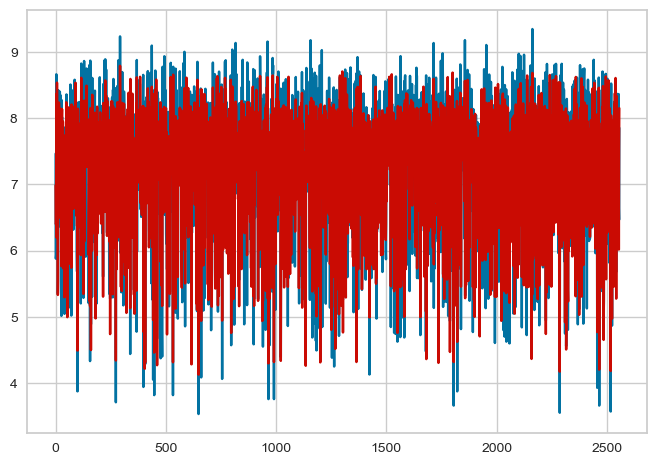

In [102]:
# [['Item_Sales', 'prediction_label']].plot()
plt.plot(y_val)
plt.plot(predictions['prediction_label'], c='r')

## Prediction On Test Data

In [103]:
# test_data

In [104]:
test_ds = full_test_df.copy()
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].apply(lambda x: rename_fat_content(x))

In [105]:
test_missing_value = test_ds.copy()
test_missing_value['Outlet_Size'] = test_missing_value.apply(lambda x: handle_missing(x), axis=1)

In [106]:
test_missing_value['Item_Weight'] = test_missing_value.apply(lambda x: handle_item_weight_missing(x), axis=1)

In [107]:
test_missing_value.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.910,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [108]:
test_missing_value["Item_Visibility"] = test_missing_value['Item_Visibility'].apply(lambda x: item_visiblity_median if x==0 else x)
# dealing_with_missing_value['Item_Visibility'].apply(lambda x: x if x==0 else x)

In [109]:
test_missing_value['Item_Type_Category'] = test_missing_value['Item_Identifier'].apply(lambda x: x[:2])

In [110]:
test_missing_value['Outlet_Age'] = 2013 - test_missing_value['Outlet_Establishment_Year']
# We used 2013 because it was stated that the data was collected in 2013

In [111]:
full_test_cleaned = test_missing_value.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [112]:
full_test_cleaned.to_csv('final_test_cleaned.csv')

In [113]:
test_data = full_test_cleaned.copy()

In [114]:
for col in categorical_columns:
    labelencoder =  label_object[col]
    test_data[col] = labelencoder.transform(test_data[col])

In [115]:
test_transformed = transformer.transform(test_data)
test_transformed_df = pd.DataFrame(test_transformed, columns=transformer.get_feature_names_out())

In [116]:
df_test = test_transformed_df.copy()
# df_val['Item_Outlet_Sales'] = y_val
df_test.head()

,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_Type,remainder__Item_MRP,remainder__Item_Type_Category,remainder__Outlet_Age
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,20.750,0.007565,13.0,107.8622,1.0,14.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.300,0.038428,4.0,87.3198,1.0,6.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,14.600,0.099575,11.0,241.7538,2.0,15.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.315,0.015388,13.0,155.0340,1.0,6.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.910,0.118599,4.0,234.2300,1.0,28.0


In [117]:
# train_model_xgb = TrainModel(xgb)
preds, scores = train_model_xgb.predict(test_transformed_df, y_val, test=True)

In [118]:
preds

array([7.2551856, 7.0979433, 6.1672935, ..., 7.402299 , 7.990288 ,
       6.9526606], dtype=float32)

In [119]:
transformed_predictions = np.expm1(preds)

In [120]:
full_test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [122]:
submission = full_test_df[['Item_Identifier']]
submission['Item_Outlet_Sales'] = transformed_predictions
submission.head()

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1414.425659
1,FDW14,1208.477051
2,NCN55,475.893677
3,FDQ58,2117.198730
4,FDY38,5065.840820


In [123]:
submission.to_csv('final_submission.csv', index=False)

In [124]:
# Saving model

# loading pickle library
import pickle

# create an iterator object with write permission - model.pkl
with open('xgb_model.pkl', 'wb') as files:
    pickle.dump(train_model_xgb, files)

## 7). Summary

This work took us through the entire journey of solving a data science problem. We started with making few hypothesis from the data. Then did data exploration, we found out some inconsistency in the data which required cleaning. Next, we performed data cleaning, data visualization and feature selection and engineering, we handled missing values and generated new features, then did data preprocessing, prepareing the data for modelling using label encoder and also one-hot-coding. Finally we built regression, ridge, lasso, decision tree and random forest model and got a glimpse of how to tune them for better results, then saved our final model.